In [1]:
from datasetsforecast.m3 import M3

dataset, *_ = M3.load('./data', 'Quarterly')

series = dataset.query(f'unique_id=="Q1"')

In [2]:
series = series.set_index('ds')['y']

<AxesSubplot: xlabel='ds'>

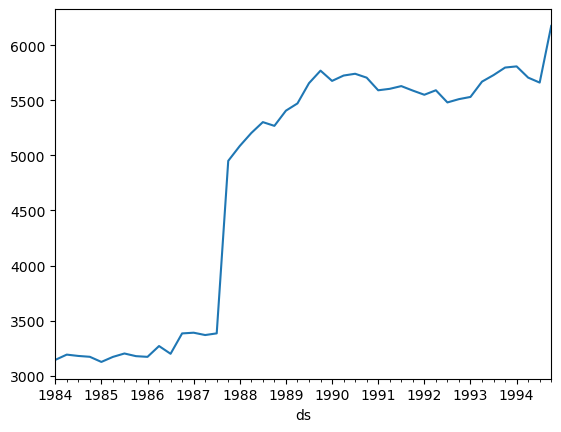

In [3]:
series.plot()

In [64]:
import pandas as pd

from plotnine import *

def plot_univariate(data, x_axis_col, y_axis_col):
    plot = \
            ggplot(data) + \
            aes(x=x_axis_col, y=y_axis_col, group=1) + \
            theme_538(base_family='Palatino', base_size=12) + \
            theme(plot_margin=.125,
                  axis_text=element_text(size=12),
                  panel_background=p9.element_rect(fill='white'),
                  plot_background=p9.element_rect(fill='white'),
                  legend_box_background=p9.element_rect(fill='white'),
                  strip_background=p9.element_rect(fill='white'),
                  legend_background=p9.element_rect(fill='white'),
                  legend_title=element_blank(),
                  legend_position=None)

    plot += geom_line(color='black', size=1)

    plot = \
        plot + \
        xlab('') + \
        ylab('') + \
        ggtitle('')
        
    return plot

/var/folders/5v/2cdqb1qd0vdbjj_br05_3_vr0000gn/T/ipykernel_11823/2578104013.py:11: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  series_with_nan[idx] = np.nan


<AxesSubplot: xlabel='ds'>

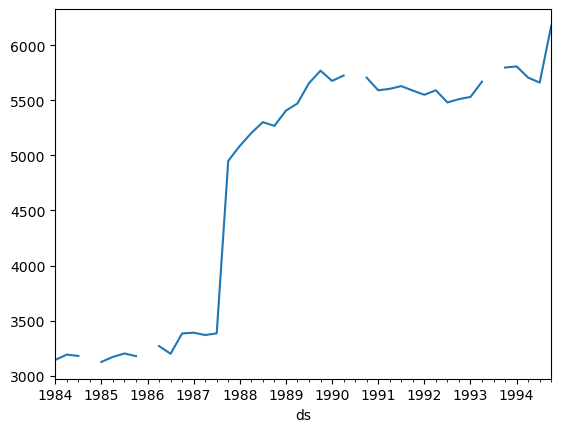

In [26]:
import numpy as np

series_with_nan = series.copy()

n = len(series)

na_size=int(0.1 * n)

idx = np.random.choice(a=range(n), size=na_size, replace=False)

series_with_nan[idx] = np.nan

In [ ]:
plot = plot_univariate(data=series_with_nan.reset_index(), x_axis_col='ds',y_axis_col='y')
plot + theme(figure_size=(10,4), axis_text=element_text(size=10))

## forward and backward propagation

<AxesSubplot: xlabel='ds'>

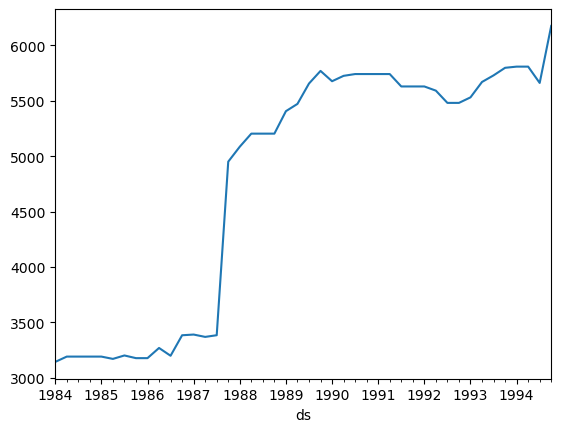

In [11]:
# forward propagation
series_with_nan.ffill()

# series_with_nan.bfill()

<AxesSubplot: xlabel='ds'>

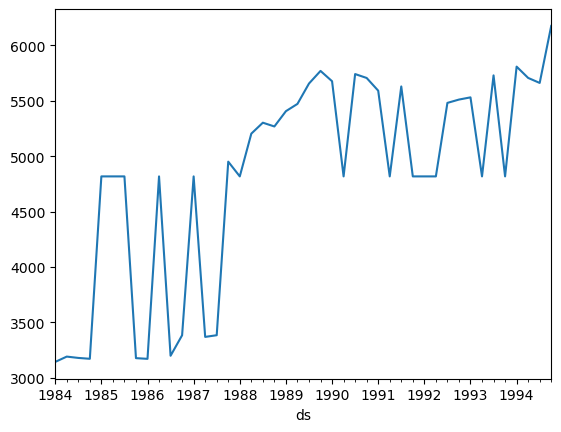

In [8]:
series_with_nan.fillna(series_with_nan.mean()).plot()

<AxesSubplot: xlabel='ds'>

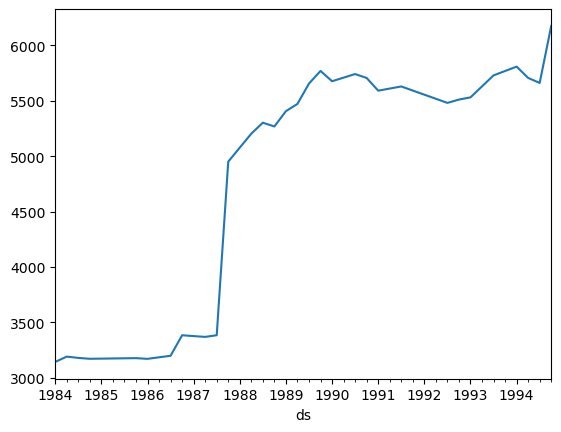

In [9]:
series_with_nan.interpolate().plot()

<AxesSubplot: xlabel='ds'>

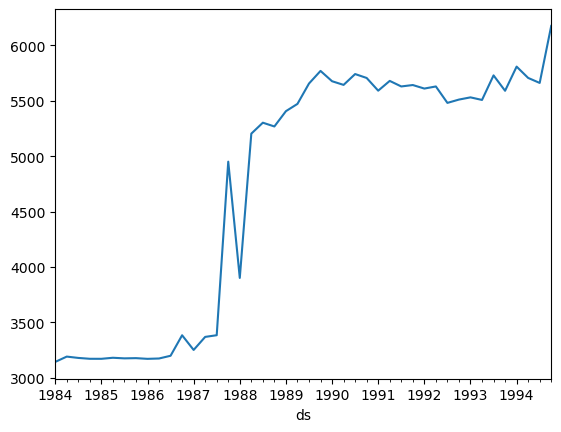

In [10]:
series_with_nan.fillna(series_with_nan.rolling(window=5, min_periods=1).mean()).plot()

In [31]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4 style="text-align: center;">{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True) 

In [33]:
import re
import pandas as pd

def series_as_supervised(series: pd.Series, n_lags: int, horizon: int):

    name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    df_list = [series.shift(i) for i in n_lags_iter]
    df = pd.concat(df_list, axis=1)#.dropna()
    df.columns = [f'{name}(t-{j - 1})'
                  if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                  for j in n_lags_iter]

    df.columns = [re.sub('t-0', 't', x) for x in df.columns]

    return df


df = series_as_supervised(series_with_nan, n_lags=5, horizon=1).tail(-10).head(10)
display_side_by_side(df, df.dropna(), titles=['With missing','Without missing'])

,y(t-4),y(t-3),y(t-2),y(t-1),y(t),y(t+1)
ds,,,,,,
1986-09-30,3170.00,3200.94,3176.75,NaN,3268.67,3198.25
1986-12-31,3200.94,3176.75,NaN,3268.67,3198.25,3383.35
1987-03-31,3176.75,NaN,3268.67,3198.25,3383.35,3389.78
1987-06-30,NaN,3268.67,3198.25,3383.35,3389.78,3368.60
1987-09-30,3268.67,3198.25,3383.35,3389.78,3368.60,3383.70
1987-12-31,3198.25,3383.35,3389.78,3368.60,3383.70,4950.95
1988-03-31,3383.35,3389.78,3368.60,3383.70,4950.95,5086.10
1988-06-30,3389.78,3368.60,3383.70,4950.95,5086.10,5203.95
1988-09-30,3368.60,3383.70,4950.95,5086.10,5203.95,5302.75


In [62]:
def multivariate_plot(data, x, y, group):
    plot = \
            ggplot(data) + \
            aes(x=x,
                y=y,
                group=group,
                color=group) + \
            theme_classic(base_family='Palatino', base_size=12) + \
            theme(plot_margin=.2,
                  axis_text=element_text(size=10),
                  axis_text_x=element_text(size=11),
                  legend_title=element_blank(),
                  legend_position='top')

    plot += geom_line(alpha=0.6, size=1.1)

    plot = \
        plot + \
        xlab('') + \
        ylab('') + \
        ggtitle('')
    
    return plot

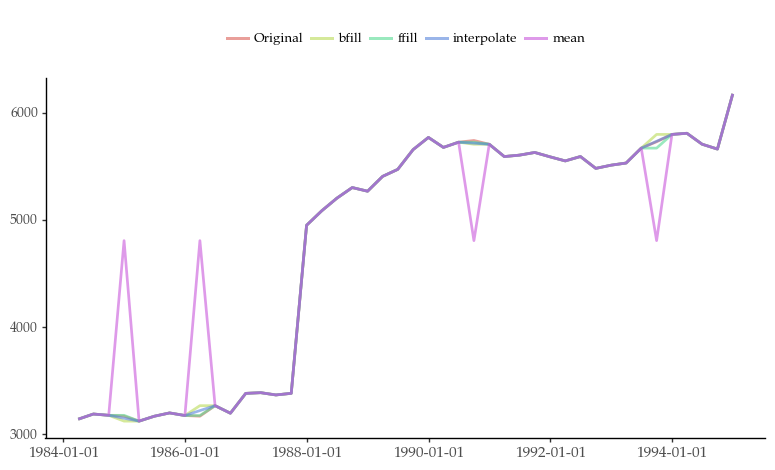

<ggplot: (8760073566371)>

In [63]:
imputation = {'ffill': series_with_nan.ffill(),
              'bfill': series_with_nan.bfill(),
              'Original': series,
              'mean': series_with_nan.fillna(series_with_nan.mean()),
              'interpolate': series_with_nan.interpolate()}

imputation_df = pd.DataFrame(imputation)

multivariate_plot(imputation_df.reset_index().melt('ds'), 'ds','value','variable') + theme(figure_size=(12,6))